반갑습니다. 오늘부터 우리 팀의 데이터 분석 프로세스에 합류하게 된 것을 환영합니다.

저는 주니어 분석가님이 단순히 코드를 실행하는 '코더(Coder)'가 아닌, 데이터 뒤에 숨겨진 맥락을 읽고 비즈니스 문제를 해결하는 **'솔버(Solver)'**로 성장하길 기대합니다. 앞으로 제가 드리는 과제들은 실제 현업에서 마주하게 될 "정제되지 않은 날것의 상황"들입니다.

기초적인 난이도부터 시작해보겠습니다. 긴장하지 말고, 본인의 논리를 펼쳐주십시오.

---

### **STEP 1: 데이터 및 시나리오 준비**

이번 케이스는 **Case B (사용자 데이터 없음)**로 진행합니다. 제가 간단한 판매 데이터를 생성했습니다.

#### **[시나리오]**

영업팀 팀장이 급하게 찾아와 다음과 같이 요청했습니다.

> "지난 주말 동안 우리 매장에서 팔린 **주요 품목별 판매량**을 한눈에 비교하고 싶어요. 가장 잘 팔린 물건이 무엇인지 바로 알 수 있게 시각화해 주세요."

#### **[데이터 (Raw Data)]**

전산 시스템에서 갓 추출한 리스트 형태의 데이터입니다.

```python
raw_data = [
    {'item_name': 'Gaming Mouse', 'sales': 150, 'status': 'active'},
    {'item_name': 'Mechanical Keyboard', 'sales': '85개', 'status': 'active'}, # 단위 포함
    {'item_name': 'Monitor Stand', 'sales': None, 'status': 'out_of_stock'}, # 결측치
    {'item_name': 'USB Hub', 'sales': '45', 'status': 'active'}, # 문자열 숫자
    {'item_name': 'Webcam', 'sales': 60, 'status': 'inactive'}
]

```

---

### **STEP 2: 문제 출제**

위 시나리오와 데이터를 보고, 분석가로서의 판단을 답변해 주십시오.

**[질문]**

1. 이 상황의 **핵심 목적(Problem)**은 무엇이며, 영업팀장의 의사결정을 돕기 위해 가장 중요한 **변수**는 무엇입니까?
2. 목적에 가장 적합한 **차트(Chart)**는 무엇입니까? (왜 그 차트를 선택했는지 이유를 설명하십시오.)
3. 시각화를 위해 필요한 **데이터 전처리 전략**은 무엇입니까?
* 특히 `sales` 컬럼의 **결측치(`None`)**와 **단위가 포함된 문자열(`'85개'`)**을 어떻게 처리할 것인지, 그리고 **정렬(Sorting)**은 어떻게 할 것인지 비즈니스 관점에서 논리적으로 설명하십시오.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = [
    {'item_name': 'Gaming Mouse', 'sales': 150, 'status': 'active'},
    {'item_name': 'Mechanical Keyboard', 'sales': '85개', 'status': 'active'}, # 단위 포함
    {'item_name': 'Monitor Stand', 'sales': None, 'status': 'out_of_stock'}, # 결측치
    {'item_name': 'USB Hub', 'sales': '45', 'status': 'active'}, # 문자열 숫자
    {'item_name': 'Webcam', 'sales': 60, 'status': 'inactive'}
]

df=pd.DataFrame(raw_data)

df.head()

,item_name,sales,status
0,Gaming Mouse,150,active
1,Mechanical Keyboard,85개,active
2,Monitor Stand,None,out_of_stock
3,USB Hub,45,active
4,Webcam,60,inactive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_name  5 non-null      object
 1   sales      4 non-null      object
 2   status     5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


### 문제에 대한 답변

1. 핵심 목적: 주요 품목 별 판매량을 시각화해야 한다. 가장 중요한 변수는 sales다.

2. 막대그래프. 품목 별 판매량 막대의 높낮이를 비교하면 한 눈에 가장 높은 품목을 판단할 수 있다.

3. 
    - sales를 먼저 전처리하여 정수형으로 변환한다.
    - none값은 status를 확인한다. status가 out_of_stock일 시, 품절로 인한 none값으로 0으로 변환해야 한다. 
    - 단위가 포함된 문자열은 .str.replace("개","").
    - 정렬은 판매량 기준 내림차순

### 답변 피드백

네, 아주 훌륭합니다.

특히 **3번 전처리 전략**에서 단순히 기술적인 처리(결측치 제거)에 그치지 않고, **`status`('out_of_stock')라는 맥락을 참고하여 `None`을 `0`으로 치환**하기로 결정한 점은 주니어 레벨에서 놓치기 쉬운 **매우 뛰어난 판단**이었습니다.

데이터 분석가는 주어진 데이터를 그대로 믿는 것이 아니라, 이처럼 **"왜 데이터가 비어있는가?"**를 비즈니스 상황(품절)과 연결할 수 있어야 합니다. 또한, 요청자가 "가장 잘 팔린 것"을 원했으므로 **내림차순 정렬**을 선택한 것도 목적 적합성이 높습니다.

논리가 완벽하므로 코드는 생략하고, 귀하가 설계한 로직대로 결과가 도출되었다고 가정하고 다음 단계로 넘어가겠습니다.

---

### **STEP 4: 인사이트 도출 (Interpretation)**

귀하의 설계대로 데이터를 정제하고 시각화했을 때, 아래와 같은 순위가 집계되었습니다.

* **1위:** Gaming Mouse (150개)
* **2위:** Mechanical Keyboard (85개)
* **3위:** Webcam (60개, status: inactive)
* **4위:** USB Hub (45개)
* **5위:** Monitor Stand (0개, status: out_of_stock)

이 결과를 바탕으로 답변해 주십시오.

> **[질문]**
> 1. 이 그래프에서 관찰되는 **사실적 패턴(Fact)**은 무엇입니까? (수치적 차이 등을 언급)
> 2. 영업팀장에게 전달할 **비즈니스 인사이트(Insight) 혹은 제안**을 2문장 이상으로 작성하십시오.
> *(힌트: 단순히 '마우스가 1등입니다'로 끝내지 마십시오. 'Webcam'의 상태나 'Monitor Stand'의 상태를 보고 어떤 조언을 줄 수 있을까요?)*
> 
>

### 답변

1. 판매량 순위를 확인해보니 마우스가 가장 높은 수치를 나타내며, 최고의 판매량을 기록했습니다. 
2. 하지만, 모니터 스탠드가 품절된 시점에 대한 파악이 필요합니다. 모니터 스탠드의 품절 이전 주말 판매량과 현재 품절이 된 주말 판매량을 비교해본다면 모니터 스탠드의 품절로 인해 얻지 못한 이익의 크기를 판단할 수 있을 것입니다. 또한, 웹캠의 경우 판매 중지임에도 불구하고 3위를 기록하고 있습니다. 판매 중지 시점을 파악하여, 주말 간 판매 중지 이전에 실제 판매된 데이터인지, 전산 오류인지를 확인할 필요가 있어 보입니다.

정확합니다. 아주 날카로운 분석입니다.

주니어 분석가들이 흔히 범하는 실수가 **"데이터가 이러하니 결과는 이렇습니다"**라는 **현상 나열**에 그치는 것입니다. 하지만 귀하께서는:

1. **Monitor Stand:** 단순한 '판매 부진'이 아니라 **'재고 부족으로 인한 기회비용 발생(Loss)'** 가능성을 짚어냈고,
2. **Webcam:** 데이터의 논리적 모순(`inactive`인데 판매량 3위)을 발견하여 **데이터 신뢰성 검증(Validation)**을 제안했습니다.

이 두 가지는 팀장이 데이터를 통해 진짜 듣고 싶어 했던 **"액션 아이템(Action Item)"**입니다. 이 분석을 보고서로 정리한다면 아래와 같이 제안할 수 있겠군요.

> "팀장님, 게이밍 마우스가 1위인 점은 고무적입니다.
> 다만, **모니터 스탠드**는 수요가 있음에도 재고가 없어 매출 손실이 발생하고 있을 가능성이 크니 **즉시 재발주**가 필요합니다.
> 또한, **웹캠**은 판매 중지 상태임에도 매출이 발생하고 있어, **전산 오류인지 재고 떨이인지 확인**이 시급합니다."

이로써 이번 시나리오의 훈련은 성공적으로 마쳤습니다.

C:\Users\gorhk\AppData\Local\Temp\ipykernel_79708\3217661767.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_sorted, x='item_name', y='sales', palette='viridis')


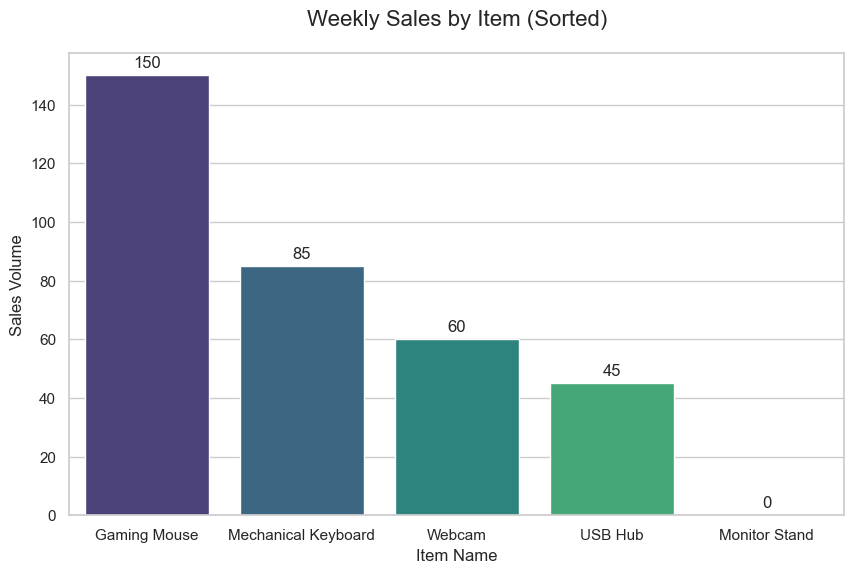

             item_name  sales        status
0         Gaming Mouse    150        active
1  Mechanical Keyboard     85        active
4               Webcam     60      inactive
3              USB Hub     45        active
2        Monitor Stand      0  out_of_stock


In [ ]:
# AI 생성 정답 코드
## 나의 주석(수정 반영 등)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# 1. 데이터 준비 (Raw Data)
# ---------------------------------------------------------
raw_data = [
    {'item_name': 'Gaming Mouse', 'sales': 150, 'status': 'active'},
    {'item_name': 'Mechanical Keyboard', 'sales': '85개', 'status': 'active'}, # 단위 포함
    {'item_name': 'Monitor Stand', 'sales': None, 'status': 'out_of_stock'}, # 결측치
    {'item_name': 'USB Hub', 'sales': '45', 'status': 'active'}, # 문자열 숫자
    {'item_name': 'Webcam', 'sales': 60, 'status': 'inactive'}
]

# DataFrame 변환
df = pd.DataFrame(raw_data)

# ---------------------------------------------------------
# 2. 데이터 전처리 (Preprocessing) - 귀하의 논리 적용
# ---------------------------------------------------------

# [Logic 1] 결측치 처리: 'status'가 'out_of_stock'인 경우 판매량을 0으로 간주
# 이유: 단순 누락이 아니라 '재고 부족으로 인해 못 판 것'이므로 0이 타당함
# (주의: 일반적인 fillna(0)을 쓰면 다른 이유의 결측치까지 0이 될 위험이 있으므로 조건부 처리 권장)
## 조건 1: status == out_of_stock & 조건 2: sales 데이터가 null인 경우
## 새로운 지식: pandas의 isnull()과 isna()는 정확히 동일하게 작동한다!
## 나의 코드로 정리
condition_stock = (df['status'] == 'out_of_stock') & (df['sales'].isnull())
df.loc[condition_stock, 'sales'] = 0

# [Logic 2] 데이터 정제: 단위('개') 제거 및 숫자 변환
# 이유: '85개'는 연산이 불가능하므로 문자열 처리 후 정수형 변환 필요
df['sales'] = df['sales'].astype(str).str.replace('개', '') # '개' 제거
df['sales'] = pd.to_numeric(df['sales']) # 숫자형(int/float)으로 변환

# [Logic 3] 정렬: 판매량 기준 내림차순
# 이유: "가장 잘 팔린 물건"을 빠르게 식별하기 위함
df_sorted = df.sort_values(by='sales', ascending=False)

# ---------------------------------------------------------
# 3. 데이터 시각화 (Visualization)
# ---------------------------------------------------------

# 그래프 스타일 설정
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid") # 가독성을 위해 격자 무늬 배경 사용

# 막대그래프(Barplot) 그리기
# x축: 품목, y축: 판매량
ax = sns.barplot(data=df_sorted, x='item_name', y='sales', palette='viridis')

# 그래프 제목 및 라벨 설정
plt.title('Weekly Sales by Item (Sorted)', fontsize=16, pad=20)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)

# 각 막대 위에 실제 수치 표시 (가독성 강화)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

# 그래프 출력
plt.show()

# (참고) 최종 데이터프레임 확인
print(df_sorted[['item_name', 'sales', 'status']])